<a href="https://colab.research.google.com/github/jiukeem/deeplearning_from_scratch/blob/master/normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np

In [21]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [23]:
sgd = SGDClassifier(loss='log', max_iter=200, tol=1e-3, random_state=42)

In [24]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)
# 83프로에서 향상시키고 싶다면? 첫번째로 loss 파라미터를 바꿔보자

0.8333333333333334

In [25]:
sgd2 = SGDClassifier(loss='hinge', max_iter=200, tol=1e-3, random_state=42)

In [26]:
sgd2.fit(x_train, y_train)
sgd2.score(x_test, y_test)
# 퍼포먼스를 더 늘리고 싶으면? 이제 하이퍼파라미터를 조정해보자

0.9385964912280702

In [53]:
# 기존의 Logistic Unit에서 learning rate 추가
class LogisticUnit:
  def __init__(self, learning_rate = 0.1):
    self.w = None
    self.b = None
    self.cost_change = []
    self.w_history = []
    self.lr = learning_rate

  def initialize_para(self, x):
    self.w = np.ones(x.shape[1])
    self.b = 0
    return self.w, self.b

  def forward_prop(self, x):
    z = np.sum(x * self.w) + self.b # x.shape = (1, nx), w.shape = (1, nx), b.shape = (1, 1) 아니면 float 이라고 쓰는게 맞나?
    a = self.sigmoid(z) # z와 a, y 모두 실수
    return a

  def sigmoid(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def back_prop(self, x, y, a):
    dw = x * (a - y)
    db = 1 * (a - y)
    return dw, db

  def fit(self, x, y, epoch=100):
    self.w, self.b = self.initialize_para(x)
    for i in range(epoch):
      cost = 0
      for x_i, y_i in zip(x, y):        
        a = self.forward_prop(x_i)
        dw, db = self.back_prop(x_i, y_i, a)
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db
        a = np.clip(a, 1e-10, 1-1e-10)
        loss = -(y_i * np.log(a) + (1 - y_i) * np.log(1 - a))
        cost += loss
        self.w_history.append(self.w.copy()) # 넘파이 배열을 리스트에 추가하면 실제 값이 복사되는게 아니라 배열을 참조하기 때문에 복사해서 추가
      cost = cost / x.shape[0]
      self.cost_change.append(cost)


  def predict(self, x, y):
    a = [self.forward_prop(x_i) for x_i in x]
    y_hat = [i > 0.5 for i in a]
    accuracy = np.mean([y_hat == y])
    return accuracy

In [54]:
unit = LogisticUnit()

In [55]:
unit.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


In [56]:
unit.predict(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


0.8157894736842105

In [58]:
w2 = [w[2] for w in unit.w_history]
w3 = [w[3] for w in unit.w_history]

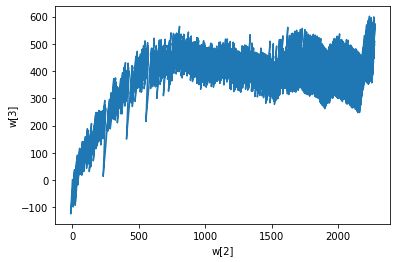

In [62]:
import matplotlib.pyplot as plt

plt.plot(w2, w3)
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()
# input normalization 을 해줍시다

In [63]:
cancer.feature_names[2]

'mean perimeter'

In [65]:
x_mean = np.mean(x, axis=0) # 열끼리 더하고 싶으니까 axis=0
x_std = np.std(x, axis=0)

In [66]:
x_scaled = (x - x_mean) / x_std

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [68]:
unit.fit(x_train, y_train)

In [69]:
unit.predict(x_test, y_test)
# 와우 성능이 어마무시하게 좋아졌네요

0.956140350877193